In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import matplotlib as mpl
plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

mpl.rc('font', **font)

In [5]:
df = pd.read_csv('\\Results_CSV\\Results_PCA_normalized.csv')

In [6]:
df.head()

,Algo,R2,MSE,APE
0,SVR(w/t),"[0.016902914182626683, 0.01829849085204316, 0....","[1744944.6343629286, 1631719.2515142648, 13184...","[0.9024713920792812, 0.8149637926250984, 0.807..."
1,SVR(w),"[0.042596417555524235, 0.0477969974845478, 0.0...","[1699340.043020612, 1582688.7868418053, 127707...","[0.8796285404035165, 0.7970962354311443, 0.791..."
2,KNN(w/t),"[0.9358629372504731, 0.900372028019299, 0.9209...","[113839.84870175437, 165595.01880701754, 10631...","[0.1031866577657674, 0.11359794979431218, 0.10..."
3,KNN(w),"[0.9875125383252851, 0.9758836755744037, 0.987...","[22164.57515789474, 40084.557754385954, 16807....","[0.043917971261719355, 0.05198969927083293, 0...."
4,GPR(w/t),"[0.6444503671862342, 0.6977480184248414, 0.715...","[631081.541160567, 502383.23212172044, 382408....","[0.17918257036947052, 0.17703689107223192, 0.1..."


In [7]:
ls  = df['Algo']
ls

0    SVR(w/t)
1      SVR(w)
2    KNN(w/t)
3      KNN(w)
4    GPR(w/t)
5      GPR(w)
6    ETR(w/t)
7      ETR(w)
Name: Algo, dtype: object

In [8]:
df.iloc[0]['R2']

'[0.016902914182626683, 0.01829849085204316, 0.019798282837261705, 0.012850161983977926, 0.009294994047578942, 0.016119114164839687, 0.01709354000858876, 0.01845127992380069, 0.019779239327382903, 0.015603609487131243]'

In [9]:
def convert_to_num(arr, ind):
    # print(arr[ind])
    arr = arr[ind]
    arr = [float(s) for s in arr[1:-1].split(',')]
    # print(arr)
    return arr

In [10]:
def convert_to_num_mape(arr, ind):
    # print(arr[ind])
    arr = arr[ind]
    arr = [float(s) for s in arr[1:-1].split(',')]
    arr = [x*100 for x in arr]
    # print(arr)
    return arr

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


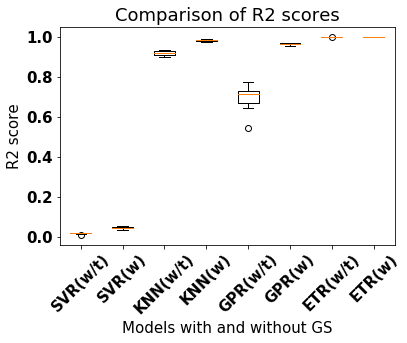

In [11]:
x = ls
y1 = []
for i in range(8):
    # x = [ls[0], ls[1]]
    a = convert_to_num(df[df['Algo'] ==ls[i]]['R2'], ind = i)
    # b = convert_to_num(df[df['Algo'] == ls[1]]['R2'], ind = 1)
    # y = [a, b ]
    y1.append(a)
plt.boxplot(y1, labels = x)
plt.xlabel('Models with and without GS')
plt.ylabel('R2 score')
plt.title('Comparison of R2 scores')
plt.xticks(rotation = 45)
# plt.savefig('Results_1.jpg')

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

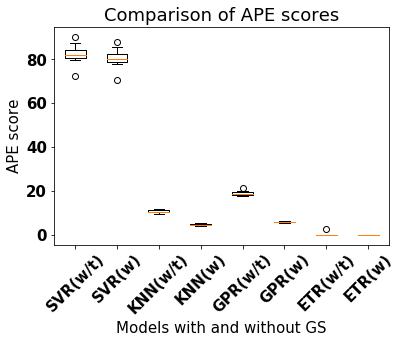

In [12]:
x = ls
y2 = []
for i in range(8):
    # x = [ls[0], ls[1]]
    a = convert_to_num_mape(df[df['Algo'] ==ls[i]]['APE'], ind = i)
    # b = convert_to_num(df[df['Algo'] == ls[1]]['R2'], ind = 1)
    # y = [a, b ]
    y2.append(a)
plt.boxplot(y2, labels = x)
plt.xlabel('Models with and without GS')
plt.ylabel('APE score')
plt.title('Comparison of APE scores')
plt.xticks(rotation = 45)
# plt.savefig('Results_1.jpg')

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

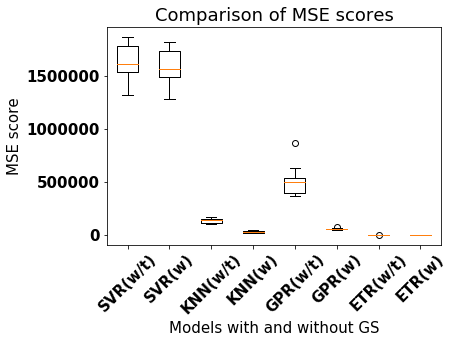

In [13]:
x = ls
y3 = []
for i in range(8):
    # x = [ls[0], ls[1]]
    a = convert_to_num(df[df['Algo'] ==ls[i]]['MSE'], ind = i)
    # b = convert_to_num(df[df['Algo'] == ls[1]]['R2'], ind = 1)
    # y = [a, b ]
    y3.append(a)
plt.boxplot(y3, labels = x)
plt.xlabel('Models with and without GS')
plt.ylabel('MSE score')
plt.title('Comparison of MSE scores')
plt.xticks(rotation = 45)
# plt.savefig('Results_1.jpg')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


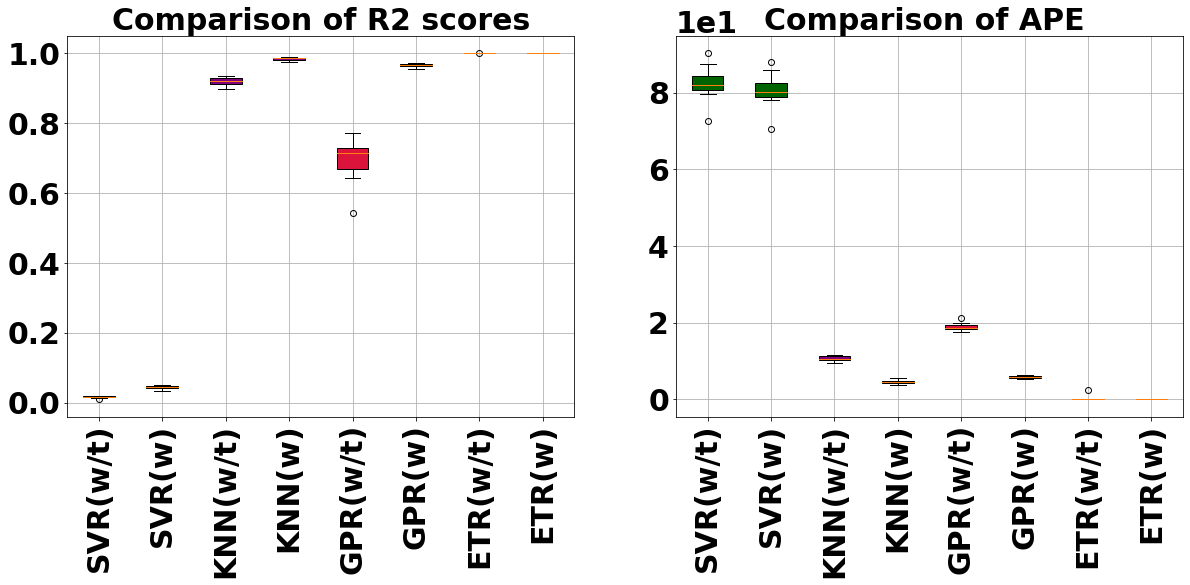

In [15]:
fig,(ax1, ax2)=  plt.subplots(1,2, figsize = (20,7))
box1 = ax1.boxplot(y1, labels = x,patch_artist = True)
# ax1.set_ylabel('R2 score')
ax1.set_title('Comparison of R2 scores', fontweight = 'bold', fontsize = 30)
ax1.set_xticklabels(ls, rotation = 90, fontsize = 30)
colors = ['darkgreen', 'darkgreen', 'purple', 'purple', 'crimson', 'crimson', 'blue', 'blue']
 
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
ax1.grid()
box2 = ax2.boxplot(y2, labels = x,patch_artist = True)
# ax2.set_ylabel('Absolute Percentage Error')
ax2.set_title('Comparison of APE ', fontweight = 'bold', fontsize = 30)
ax2.set_xticklabels(ls, rotation = 90, fontsize = 30)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
ax2.grid()

plt.rc('font', size=30)

plt.savefig('result_pca.pdf', bbox_inches = 'tight')

In [66]:
r2_without_PCA = [np.mean(y1[0]) , np.mean(y1[2]) , np.mean(y1[4]), np.mean(y1[6])]
np.mean(r2_without_PCA) 

0.6576886854397355

In [67]:
r2_with_PCA = [np.mean(y1[1]) , np.mean(y1[3]) , np.mean(y1[5]), np.mean(y1[7])]
np.mean(r2_with_PCA) 

0.7486734058671134

In [68]:
mape_without_PCA = [np.median(y2[0]) , np.median(y2[2]) , np.median(y2[4]), np.median(y2[6])]
np.mean(mape_without_PCA) 

27.766792914598625

In [69]:
mape_with_PCA = [np.median(y2[1]) , np.median(y2[3]) , np.median(y2[5]), np.median(y2[7])]
np.mean(mape_with_PCA) 

22.587118374387728

In [70]:
mse_without_PCA = [np.mean(y3[0]) , np.mean(y3[2]) , np.mean(y3[4]), np.mean(y3[6])]
np.mean(mse_without_PCA) 

567646.7175457027